In [1]:
import numpy as np
import pandas as pd
import sklearn as sns
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train[1].csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.shape

(614, 13)

In [6]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
data.drop(["Gender","Married","Loan_ID"], axis=1,  inplace= True)
data.columns

Index(['Dependents', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
data["Dependents"] = data["Dependents"].str.replace('+','')

C:\Users\91999\AppData\Local\Temp/ipykernel_1736/1176009858.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Dependents"] = data["Dependents"].str.replace('+','')


In [9]:
data.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
data.isna().sum()

Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

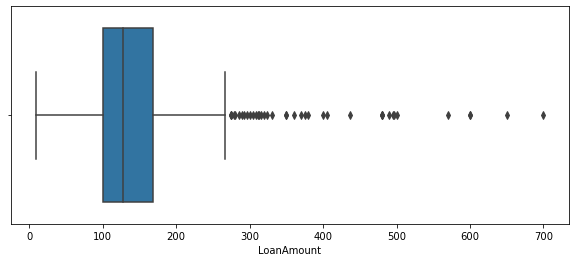

In [11]:
plt.figure(figsize = (10,4))
sn.boxplot(x = 'LoanAmount',
            data = data,
            orient = 'horizontal')
plt.show()

In [12]:
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace = True)

In [13]:
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace = True)

In [14]:
data["LoanAmount"].fillna(data["LoanAmount"].mean(),inplace = True)

In [15]:
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean(),inplace = True)

In [16]:
data["Credit_History"].fillna(data["Credit_History"].mean(),inplace = True)

In [17]:
data.isna().sum()

Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
data.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [19]:
data.replace({'Self_Employed':{'No':0,'Yes':1},
              'Education':{'Graduate':1,'Not Graduate':0},
              'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
             'Loan_Status':{'Y':1, 'N':0}}, inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         614 non-null    object 
 1   Education          614 non-null    int64  
 2   Self_Employed      614 non-null    int64  
 3   ApplicantIncome    614 non-null    int64  
 4   CoapplicantIncome  614 non-null    float64
 5   LoanAmount         614 non-null    float64
 6   Loan_Amount_Term   614 non-null    float64
 7   Credit_History     614 non-null    float64
 8   Property_Area      614 non-null    int64  
 9   Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 48.1+ KB


In [21]:
data.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         614 non-null    object 
 1   Education          614 non-null    int64  
 2   Self_Employed      614 non-null    int64  
 3   ApplicantIncome    614 non-null    int64  
 4   CoapplicantIncome  614 non-null    float64
 5   LoanAmount         614 non-null    float64
 6   Loan_Amount_Term   614 non-null    float64
 7   Credit_History     614 non-null    float64
 8   Property_Area      614 non-null    int64  
 9   Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 48.1+ KB


In [23]:
data["Dependents"]=pd.to_numeric(data["Dependents"],errors='coerce')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         614 non-null    int64  
 1   Education          614 non-null    int64  
 2   Self_Employed      614 non-null    int64  
 3   ApplicantIncome    614 non-null    int64  
 4   CoapplicantIncome  614 non-null    float64
 5   LoanAmount         614 non-null    float64
 6   Loan_Amount_Term   614 non-null    float64
 7   Credit_History     614 non-null    float64
 8   Property_Area      614 non-null    int64  
 9   Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 48.1 KB


In [25]:
data.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [26]:
for i in data.columns[1:]:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

In [27]:
X = data.drop(columns=['Loan_Status'],axis=1)
y = data['Loan_Status']

In [28]:
X.shape

(614, 9)

In [29]:
y.shape

(614,)

In [30]:
# Testing Data - 10%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=data['Loan_Status'], random_state = 42)
# Train & Valid Data - 90%
#x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train, random_state = 42)

In [31]:
X_train.shape

(429, 9)

In [32]:
y_train.shape

(429,)

In [33]:
X_test.shape

(185, 9)

In [34]:
y_test.shape

(185,)

In [35]:
# Creating a skeleton of model.

from tensorflow import keras

from keras.models import Sequential
# Defining layers
from keras.layers import Input, Dense

In [36]:
X_train.shape[1]

9

In [37]:
from tensorflow.keras.layers import InputLayer

# Input neurons
input_neurons = (None,X_train.shape[1])
# Output neurons (Since it is binary classification)
output_neurons = 1
# Defining hidden layers & neurons in each layersnumber_of_hidden_layers = 2
neuron_hidden_layer_1         = 10
neuron_hidden_layer_2         = 5
# Defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [38]:
#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [39]:
model_history = model.fit(X_train, y_train, epochs = 90)

Epoch 1/90
14/14 [==============================] - 0s 847us/step - loss: 0.8274 - accuracy: 0.2821
Epoch 2/90
14/14 [==============================] - 0s 615us/step - loss: 0.7719 - accuracy: 0.3007
Epoch 3/90
14/14 [==============================] - 0s 616us/step - loss: 0.7351 - accuracy: 0.3869
Epoch 4/90
14/14 [==============================] - 0s 616us/step - loss: 0.7092 - accuracy: 0.4359
Epoch 5/90
14/14 [==============================] - 0s 692us/step - loss: 0.6918 - accuracy: 0.5641
Epoch 6/90
14/14 [==============================] - 0s 692us/step - loss: 0.6806 - accuracy: 0.6737
Epoch 7/90
14/14 [==============================] - 0s 692us/step - loss: 0.6723 - accuracy: 0.6783
Epoch 8/90
14/14 [==============================] - 0s 616us/step - loss: 0.6642 - accuracy: 0.6760
Epoch 9/90
14/14 [==============================] - 0s 692us/step - loss: 0.6554 - accuracy: 0.6830
Epoch 10/90
14/14 [==============================] - 0s 692us/step - loss: 0.6446 - accuracy: 0.6853

In [40]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
# Getting accuracy score1
from sklearn.metrics import accuracy_score
print("Accuracy_Score : {}".format(accuracy_score(y_pred, y_test) * 100))

6/6 [==============================] - 0s 600us/step
Accuracy_Score : 85.4054054054054


<function matplotlib.pyplot.show(close=None, block=None)>

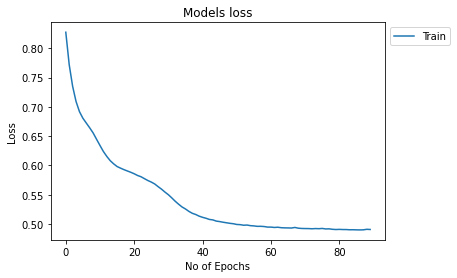

In [41]:
#summarize history of loss
import matplotlib.pyplot as plt
plt.plot( model_history.history["loss"])
plt.title("Models loss")
plt.ylabel('Loss')
plt.xlabel('No of Epochs')
plt.legend(['Train'], loc='upper left',bbox_to_anchor = (1,1))
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

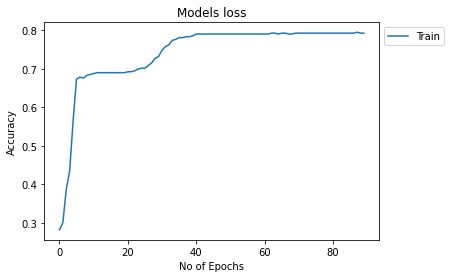

In [42]:
#summarize history of Accuracy
plt.plot( model_history.history["accuracy"])
plt.title("Models loss")
plt.ylabel('Accuracy')
plt.xlabel('No of Epochs')
plt.legend(['Train'], loc='upper left',bbox_to_anchor = (1,1))
plt.show

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 10)          100       
                                                                 
 dense_1 (Dense)             (None, None, 5)           55        
                                                                 
 dense_2 (Dense)             (None, None, 1)           6         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
